# Esther McCabe
### June 24, 2019
### GENBA 894

## Factors that influence the sale price of lots of beef calves and feeder cattle sold via summer video auction from 1995 through 2018

In [200]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.beefmagazine.com/sites/beefmagazine.com/files/styles/article_featured_standard/public/baby-beef-calves-weaned20070718dab48.jpg?itok=-978nEuZ")

## Data Description

#### This observational dataset has been collected since 1995 through 2018 from one video auction company. Over the last 24 years, the same person has input all data into the database. The database is currently maintained in Access and updated throughout the year. There are 241,278 lots of cattle in the database, each with numerous variables collected such as sale date, weight, breed, etc. All the lot information is provided electronically by the video auction company. These 241,278 lots represent 26,435,097 head of cattle. 

#### For this project, only sold lots of beef calves from the summer sales are included, which includes 94,872 lots.

#### Variables:
- SYEAR: Sale Year 1995 - 2018
- LOTID: Count of number of lots of beef calves
- SMONTH: Sale Month 1=January, 12=December
- SUMMER: Sold in a summer sale, all 1=Yes
- HEAD: Number of calves in a lot
- SEX: Gender of lot, 1=Steer, 2=Heifer
- ATYPE: Animal Type, 0=Unweaned, 1=Weaned
- WT: Average weight of the lot (total lot weight/# of head in lot)
- PRICE: Sale Price of lot ($/cwt)
- STATE: STate of origin of lot
- STATECODE: Code of state, alphabetical order starting with 1
- SAREA: Sale area, the states are divided into five areas or regions, 1=West Coast, 2=Rocky Mountain/North Central, 3=South Central, 4=Northeast, 5=Southeast
- BREED: General breed of the lot, 1=English, English crossed, 3=English-Contenintal crossed, 4=Brahman-influenced
- FRAME: Frame score of calves in lot, 3=Small, 4=Medium, 5=Large
- FLESH: Amount of flesh (body condition) of calves in lot, 2=Light, 3=Light/Medium, 4=Medium, 5=Heavy
- VAC: Vaccinations of lot, 0=vaccinated but not qualified for program, 1=vaccinated and qualify for program


### Feeder Cattle Lots

Lots of feeder cattle are included in the dataset as well, however, feeder cattle lots are not as frequent and do not appear every year (present 1996 - 2018).  

#### Variables:
- SYEAR: Sale Year 1995 - 2018
- LOTID: Count of number of lots of beef calves
- SMONTH: Sale Month 1=January, 12=December
- SUMMER: Sold in a summer sale, all 1=Yes
- HEAD: Number of calves in a lot
- SEX: Gender of lot, 1=Steer, 2=Heifer
- ATYPE: Animal Type, 0=Unweaned, 1=Weaned
- WT: Average weight of the lot (total lot weight/# of head in lot)
- PRICE: Sale Price of lot ($/cwt)
- STATE: STate of origin of lot
- STATECODE: Code of state, alphabetical order starting with 1
- SAREA: Sale area, the states are divided into five areas or regions, 1=West Coast, 2=Rocky Mountain/North Central, 3=South Central, 4=Northeast, 5=Southeast
- BREED: General breed of the lot, 1=English, English crossed, 3=English-Contenintal crossed, 4=Brahman-influenced
- FRAME: Frame score of calves in lot, 3=Small, 4=Medium, 5=Large
- FLESH: Amount of flesh (body condition) of calves in lot, 2=Light, 3=Light/Medium, 4=Medium, 5=Heavy
- VAC: Vaccinations of lot, 0=vaccinated but not qualified for program, 1=vaccinated and qualify for program

In [41]:
# import python packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

## Lots of Beef Calves

In [159]:
# import dataset
SLA=pd.read_csv("DATA/DATAR.csv")
SLA.head()

,SYEAR,LOTID,SMONTH,SUMMER,HEAD,SEX,ATYPE,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,1995,1,6,1,115,1,1,425,81.25,OK,25,3,3,4,4,1
1,1995,2,6,1,220,1,1,460,80.00,OK,25,3,3,4,4,1
2,1995,3,6,1,84,1,1,570,77.00,MO,23,3,1,4,4,1
3,1995,4,6,1,83,1,1,610,74.50,KS,22,3,3,5,4,0
4,1995,5,6,1,155,1,1,625,68.10,MS,46,5,4,3,4,0


In [108]:
#data types & missing values
SLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94872 entries, 0 to 94871
Data columns (total 16 columns):
SYEAR        94872 non-null int64
LOTID        94872 non-null int64
SMONTH       94872 non-null int64
SUMMER       94872 non-null int64
HEAD         94872 non-null int64
SEX          94872 non-null int64
ATYPE        94872 non-null int64
WT           94872 non-null int64
PRICE        94872 non-null float64
STATE        94872 non-null object
STATECODE    94872 non-null int64
SAREA        94872 non-null int64
BREED        94872 non-null int64
FRAME        94872 non-null int64
FLESH        94872 non-null int64
VAC          94872 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 11.6+ MB


##### There are no missing data in this dataset.

In [109]:
#Describe shows a quick statistic summary of your data
#this is a good way to examine the numerical columns
SLA.describe()

,SYEAR,LOTID,SMONTH,SUMMER,HEAD,SEX,ATYPE,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
count,94872.000000,94872.000000,94872.000000,94872.0,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.00000,94872.000000,94872.00000
mean,2008.162883,115776.113606,7.472605,1.0,111.481154,1.392371,0.334440,560.953021,134.750527,15.956742,2.189687,2.358357,3.72113,3.888144,0.72952
std,6.409211,66999.030234,1.038856,0.0,71.953652,0.488281,0.471797,79.046282,48.860322,10.544034,1.027427,1.199246,0.73720,0.552910,0.44421
min,1995.000000,1.000000,4.000000,1.0,5.000000,1.000000,0.000000,235.000000,41.250000,0.000000,1.000000,1.000000,1.00000,1.000000,0.00000
25%,2003.000000,63342.750000,7.000000,1.0,79.000000,1.000000,0.000000,500.000000,103.000000,7.000000,2.000000,1.000000,3.00000,4.000000,0.00000
50%,2009.000000,104860.500000,7.000000,1.0,90.000000,1.000000,0.000000,550.000000,124.000000,15.000000,2.000000,3.000000,4.00000,4.000000,1.00000
75%,2013.000000,172941.250000,8.000000,1.0,110.000000,2.000000,1.000000,610.000000,155.000000,22.000000,3.000000,3.000000,4.00000,4.000000,1.00000
max,2018.000000,239006.000000,11.000000,1.0,1380.000000,2.000000,1.000000,960.000000,422.000000,50.000000,5.000000,4.000000,7.00000,7.000000,1.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000028327AC8>,
      dtype=object)

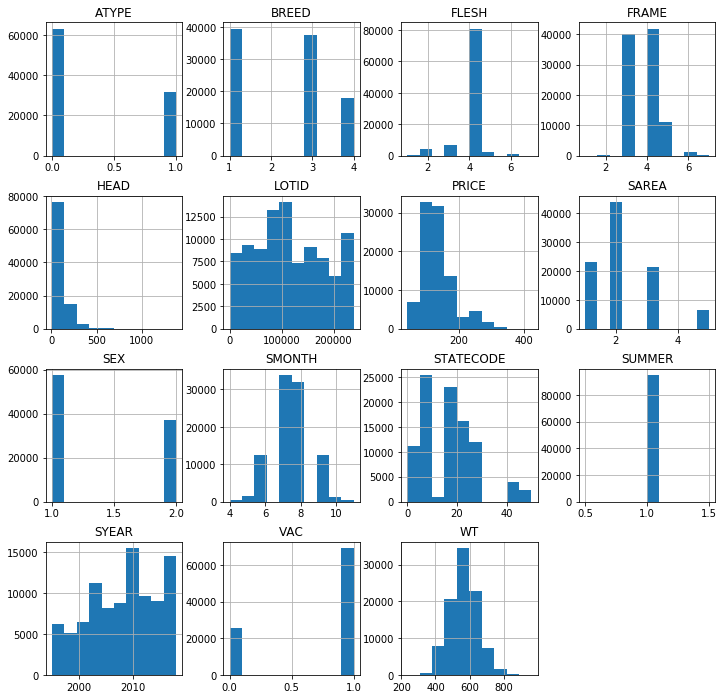

In [110]:
SLA.hist(figsize=(12,12))

In [111]:
# value count but using describe 
SLA.groupby('STATE').size()

STATE
AL      143
AR      319
AZ      863
CA      248
CO    10771
FL     3491
GA      244
IA      460
ID     6710
IL      222
IN       29
KS     3326
KY       25
LA     1689
ME        1
MI      157
MN      166
MO      948
MS      167
MT    13267
NC      385
ND     2032
NE     4940
NM     3726
NV     3924
OH       20
OK     2346
OR     5679
SC       12
SD     3565
TN       49
TX    10116
UT     5994
VA       41
WA      511
WI       82
WY     8204
dtype: int64

In [112]:
# value count but using describe 
SLA.groupby('VAC').size()

VAC
0    25661
1    69211
dtype: int64

In [113]:
# value count but using describe 
SLA.groupby('FLESH').size()

FLESH
1      107
2     4104
3     6466
4    80780
5     2460
6      942
7       13
dtype: int64

In [114]:
# value count but using describe 
SLA.groupby('FRAME').size()

FRAME
1       14
2      191
3    40262
4    41811
5    11102
6     1349
7      143
dtype: int64

In [115]:
# value count but using describe 
SLA.groupby('BREED').size()

BREED
1    39396
3    37558
4    17918
dtype: int64

In [116]:
# value count but using describe 
SLA.groupby('SAREA').size()

SAREA
1    23066
2    43895
3    21325
4       21
5     6565
dtype: int64

In [117]:
# value count but using describe 
SLA.groupby('SMONTH').size()

SMONTH
4       568
5      1653
6     12535
7     33883
8     32043
9     12591
10     1239
11      360
dtype: int64

In [118]:
# value count but using describe 
SLA.groupby('SEX').size()

SEX
1    57647
2    37225
dtype: int64

In [119]:
# value count but using describe 
SLA.groupby('SYEAR').size()

SYEAR
1995    1823
1996    2161
1997    2205
1998    2108
1999    2985
2000    3342
2001    3119
2002    3170
2003    3904
2004    4231
2005    4313
2006    3869
2007    4605
2008    4164
2009    4199
2010    5832
2011    5512
2012    4400
2013    5292
2014    4503
2015    4572
2016    4695
2017    5122
2018    4746
dtype: int64

### Combining Groups

#### Frame

In [152]:
SLA.groupby('FRAME').size()

FRAME
3    40467
4    41811
5    12594
dtype: int64

In [137]:
SLA = SLA.replace({'FRAME': 1}, {'FRAME': 3})

In [138]:
SLA = SLA.replace({'FRAME': 2}, {'FRAME': 3})

In [133]:
SLA = SLA.replace({'FRAME': 7}, {'FRAME': 5})

In [134]:
SLA = SLA.replace({'FRAME': 6}, {'FRAME': 5})

In [143]:
SLA.groupby('FRAME').size()

FRAME
3    40467
4    41811
5    12594
dtype: int64

#### Flesh

In [144]:
SLA = SLA.replace({'FLESH': 1}, {'FLESH': 2})

In [145]:
SLA = SLA.replace({'FLESH': 7}, {'FLESH': 5})

In [146]:
SLA = SLA.replace({'FLESH': 6}, {'FLESH': 5})

In [147]:
SLA.groupby('FLESH').size()

FLESH
2     4211
3     6466
4    80780
5     3415
dtype: int64

#### SAREA

In [150]:
SLA = SLA.replace({'SAREA': 4}, {'SAREA': 5})

In [151]:
SLA.groupby('SAREA').size()

SAREA
1    23066
2    43895
3    21325
5     6586
dtype: int64

In [153]:
SLA.groupby('VAC').size()

VAC
0    25661
1    69211
dtype: int64

## Lots of Feeder Cattle

In [199]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.amscattle.com/wp-content/uploads/2013/02/DSCN7633.jpg")

In [175]:
# import dataset
FEEDER=pd.read_csv("DATA/FEEDER.csv")
FEEDER.head()

,SYEAR,LOTID,SUMMER,SMONTH,HEAD,SEX,ATYPE,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,2010,111922,1,6,39,1,2,640,105.25,TX,26,3,4,4,4,0
1,2010,111923,1,6,39,2,2,640,98.25,TX,26,3,4,4,4,0
2,2010,111924,1,6,35,1,2,700,105.50,LA,45,5,4,3,2,0
3,2010,111925,1,6,35,2,2,700,99.50,LA,45,5,4,3,2,0
4,2010,111926,1,6,32,1,2,735,105.25,TX,26,3,4,4,4,1


In [176]:
#data types & missing values
FEEDER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23862 entries, 0 to 23861
Data columns (total 16 columns):
SYEAR        23862 non-null int64
LOTID        23862 non-null int64
SUMMER       23862 non-null int64
SMONTH       23862 non-null int64
HEAD         23862 non-null int64
SEX          23862 non-null int64
ATYPE        23862 non-null int64
WT           23862 non-null int64
PRICE        23862 non-null float64
STATE        23862 non-null object
STATECODE    23862 non-null int64
SAREA        23862 non-null int64
BREED        23862 non-null int64
FRAME        23862 non-null int64
FLESH        23862 non-null int64
VAC          23862 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 2.9+ MB


There are no missing values.

In [177]:
#Describe shows a quick statistic summary of your data
#this is a good way to examine the numerical columns
FEEDER.describe()

,SYEAR,LOTID,SUMMER,SMONTH,HEAD,SEX,ATYPE,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
count,23862.000000,23862.000000,23862.0,23862.000000,23862.000000,23862.000000,23862.0,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000
mean,2006.862794,102383.966181,1.0,7.381779,125.887646,1.387436,2.0,783.060096,114.905306,20.295658,2.710712,2.957170,3.851018,3.904534,0.168511
std,6.809251,68804.910226,0.0,1.265613,115.485876,0.487175,0.0,84.878691,40.284065,11.163846,1.079662,1.130818,0.766896,0.581288,0.374327
min,1996.000000,2935.000000,1.0,4.000000,4.000000,1.000000,2.0,420.000000,45.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2001.000000,41040.500000,1.0,7.000000,63.000000,1.000000,2.0,725.000000,82.500000,10.000000,2.000000,3.000000,3.000000,4.000000,0.000000
50%,2005.000000,85380.500000,1.0,7.000000,74.000000,1.000000,2.0,780.000000,108.000000,22.000000,3.000000,3.000000,4.000000,4.000000,0.000000
75%,2013.000000,159297.750000,1.0,8.000000,140.000000,2.000000,2.0,840.000000,137.825000,26.000000,3.000000,4.000000,4.000000,4.000000,0.000000
max,2018.000000,238997.000000,1.0,11.000000,1800.000000,2.000000,2.0,1125.000000,267.000000,50.000000,5.000000,4.000000,7.000000,7.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000031617128>,
      dtype=object)

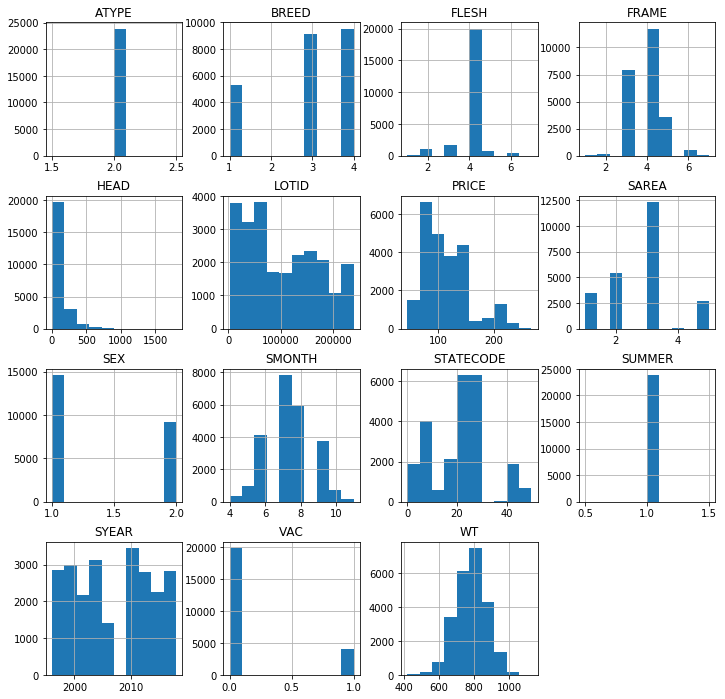

In [178]:
FEEDER.hist(figsize=(12,12))

### VAC

In [179]:
# value count but using describe 
FEEDER.groupby('VAC').size()

VAC
0    19841
1     4021
dtype: int64

### FRAME

In [180]:
# value count but using describe 
FEEDER.groupby('FRAME').size()

FRAME
1       13
2      149
3     7890
4    11727
5     3549
6      479
7       55
dtype: int64

In [181]:
FEEDER = FEEDER.replace({'FRAME': 1}, {'FRAME': 3})

In [182]:
FEEDER = FEEDER.replace({'FRAME': 2}, {'FRAME': 3})

In [183]:
FEEDER = FEEDER.replace({'FRAME': 7}, {'FRAME': 5})

In [184]:
FEEDER = FEEDER.replace({'FRAME': 6}, {'FRAME': 5})

In [185]:
# value count but using describe 
FEEDER.groupby('FRAME').size()

FRAME
3     8052
4    11727
5     4083
dtype: int64

### FLESH

In [186]:
# value count but using describe 
FEEDER.groupby('FLESH').size()

FLESH
1       26
2     1029
3     1668
4    19979
5      796
6      362
7        2
dtype: int64

In [187]:
FEEDER = FEEDER.replace({'FLESH': 1}, {'FLESH': 2})

In [188]:
FEEDER = FEEDER.replace({'FLESH': 7}, {'FLESH': 5})

In [189]:
FEEDER = FEEDER.replace({'FLESH': 6}, {'FLESH': 5})

In [190]:
# value count but using describe 
FEEDER.groupby('FLESH').size()

FLESH
2     1055
3     1668
4    19979
5     1160
dtype: int64

### BREED

In [191]:
# value count but using describe 
FEEDER.groupby('BREED').size()

BREED
1    5263
3    9095
4    9504
dtype: int64

### SAREA

In [197]:
FEEDER = FEEDER.replace({'SAREA': 4}, {'SAREA': 5})

In [198]:
# value count but using describe 
FEEDER.groupby('SAREA').size()

SAREA
1     3428
2     5410
3    12324
5     2700
dtype: int64